In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [49]:
cleaned_data_path = (
    "C:\\Users\\htoll\\Desktop\\Uni\\Y3S1\\COMP4702\\report\\Cleaned_data.csv"
)
data = pd.read_csv(cleaned_data_path)

# Separate features and target
X = data.drop(columns=["Species_Population"])
y = data["Species_Population"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [50]:
# Function to add noise to data
def add_noise(X, noise_percent):
    std_devs = X.std(axis=0)
    noise = np.random.normal(0, std_devs, X.shape) * noise_percent
    X_noisy = X + noise
    return X_noisy


# Function to add noise to data
noise_levels = [0, 0.01, 0.025, 0.05, 0.1, 0.2]

In [51]:
# Adding noise to the training data
X_train_noisy_list = [add_noise(X_train, noise) for noise in noise_levels]

# Standardize the data (including noisy versions)
scaler = StandardScaler()
X_train_scaled_list = [scaler.fit_transform(X_noisy) for X_noisy in X_train_noisy_list]
X_test_scaled = scaler.transform(X_test)

In [52]:
# Perform grid search for 0% noise level
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf"]}
svm_model = SVC()
grid_search = GridSearchCV(
    svm_model, param_grid, refit=True, verbose=1, cv=5, n_jobs=-1
)

# Train the grid search model
grid_search.fit(X_train_scaled_list[0], y_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
print(f"Best Parameters for 0% noise: {best_params}")

# Initialize the SVM model with best parameters
best_svm_model = grid_search.best_estimator_

svc = SVC(C=100, gamma=0.01, kernel="rbf")


In [53]:
accuracies = []

for i, X_train_scaled in enumerate(X_train_scaled_list):
    # Train the model
    svc.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svc.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Noise Level: {noise_levels[i]*100}%: Accuracy: {accuracy:.4f}")

Noise Level: 0%: Accuracy: 0.8150
Noise Level: 1.0%: Accuracy: 0.8121
Noise Level: 2.5%: Accuracy: 0.8208
Noise Level: 5.0%: Accuracy: 0.8064
Noise Level: 10.0%: Accuracy: 0.8121
Noise Level: 20.0%: Accuracy: 0.7746


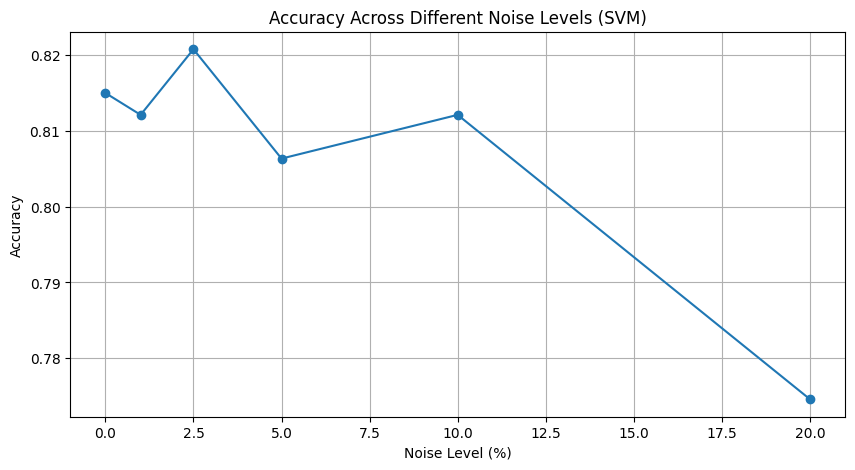

In [54]:
# Plot accuracies across different noise levels
plt.figure(figsize=(10, 5))
plt.plot([n * 100 for n in noise_levels], accuracies, marker="o")
plt.title("Accuracy Across Different Noise Levels (SVM)")
plt.xlabel("Noise Level (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [55]:
# Display all accuracies
for noise, acc in zip(noise_levels, accuracies):
    print(f"Accuracy at {noise*100}% noise: {acc:.4f}")

Accuracy at 0% noise: 0.8150
Accuracy at 1.0% noise: 0.8121
Accuracy at 2.5% noise: 0.8208
Accuracy at 5.0% noise: 0.8064
Accuracy at 10.0% noise: 0.8121
Accuracy at 20.0% noise: 0.7746
